In [15]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
SE_size_factor = 0.02
lam_factor = 5
area_factor = 0.03
connectivity = 4
#min_thres = 1
#max_thres = 255
#stepsize = 10
min_thres = 125
max_thres = 125
stepsize=1
perc = 0.6
lam = 45

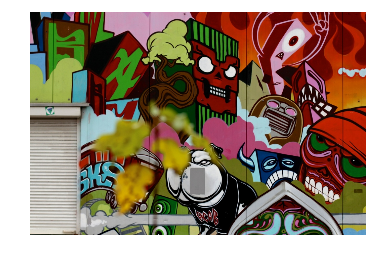

In [18]:
#Load the image
path_to_image = '../tests/images/Color/color.png'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [19]:
#our detection object
det = sr.MSSRDetector(
            min_thres=min_thres, max_thres=max_thres, step=stepsize,
            perc=perc, SE_size_factor=SE_size_factor,
            lam_factor=lam_factor,
            area_factor=area_factor,
            connectivity=connectivity)

('threshold', 125)


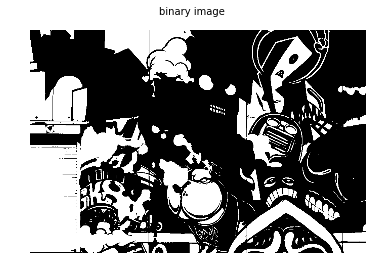

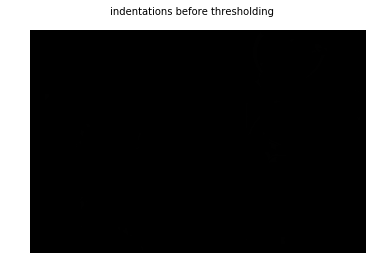

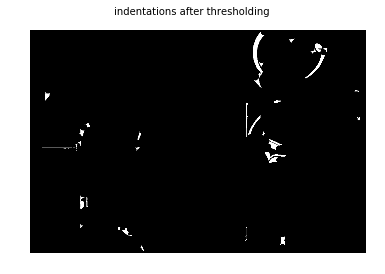

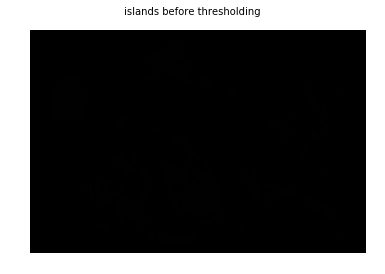

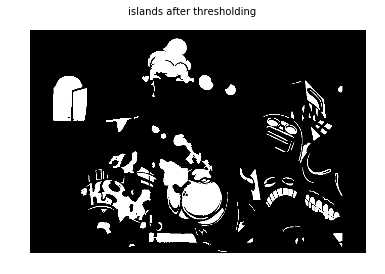

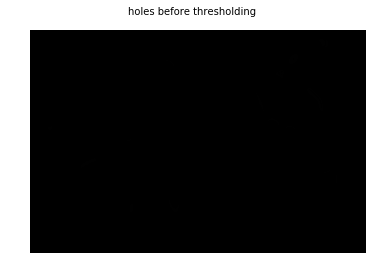

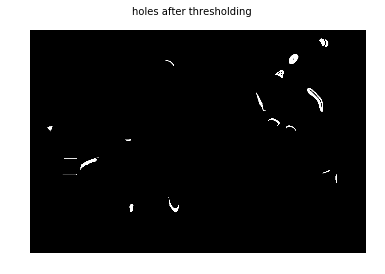

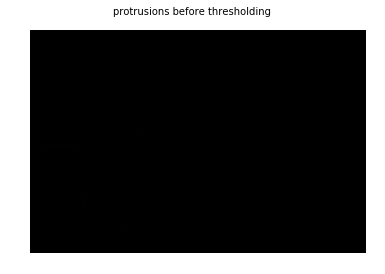

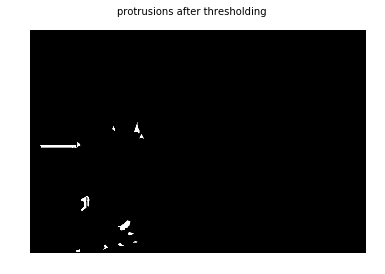

(45, (17, 17))


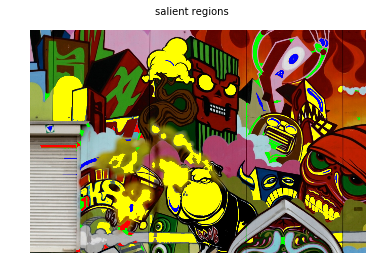

In [20]:
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=True)
print(det.lam, det.SE.shape)#, lam
sr.visualize_elements(img, regions=regions);

In [21]:
assert det.lam == lam

{'indentations': 34, 'islands': 116, 'holes': 18, 'protrusions': 12}


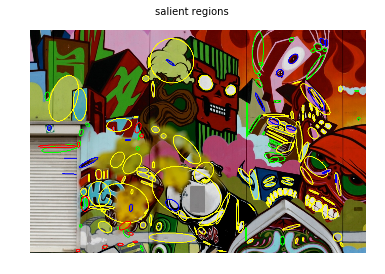

In [22]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, 
                                                                                connectivity=connectivity)
print(num_regions)
sr.visualize_elements_ellipses(img, features_standard);

{'indentations': 81, 'islands': 152, 'holes': 25, 'protrusions': 107}


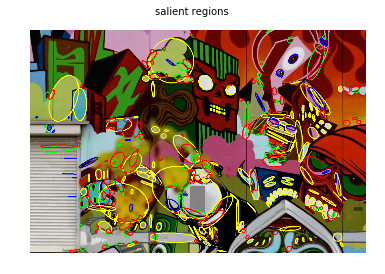

In [23]:
#sr.read_matfile('../tests/features/Color/color_allregions.mat', 
holes_true, islands_true, indents_true,  prots_true = \
    sr.read_matfile('../tests/features/Color/color_dmsrallregions.mat', visualize=False)
regions_dmsra = {"holes": holes_true, "islands": islands_true, 
                "indentations": indents_true, "protrusions":prots_true}
#sr.visualize_elements(img, regions_dmsra);
num_regions_dmsra, features_standard_dmsra, features_poly_dmsra = sr.binary_mask2ellipse_features(regions_dmsra, 
                                                                                connectivity=connectivity)
print(num_regions_dmsra)
sr.visualize_elements_ellipses(img, features_standard_dmsra);

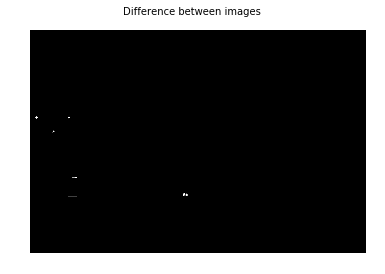

False


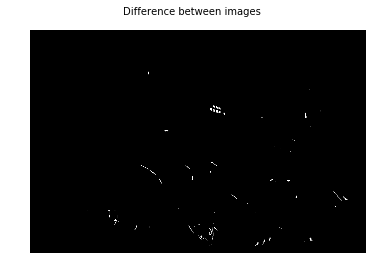

False


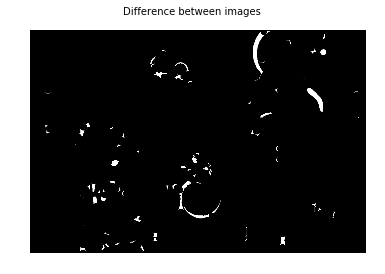

False


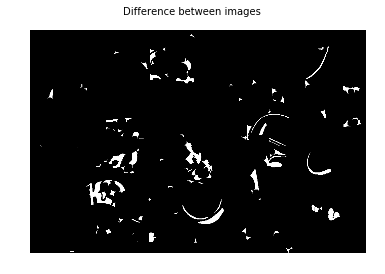

False


In [24]:
print(sr.image_diff(regions['holes'], holes_true))
print(sr.image_diff(regions['islands'], islands_true))
print(sr.image_diff(regions['indentations'], indents_true))
print(sr.image_diff(regions['protrusions'], prots_true))

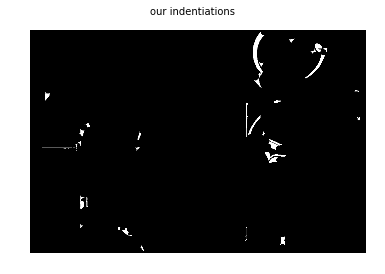

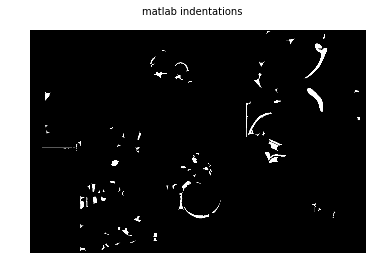

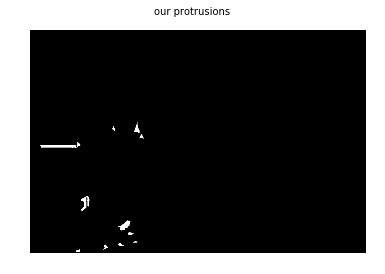

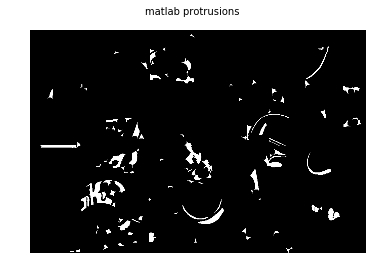

In [25]:
sr.show_image(regions['indentations'], "our indentiations")
sr.show_image(indents_true, "matlab indentations")
sr.show_image(regions['protrusions'], "our protrusions")
sr.show_image(prots_true, "matlab protrusions")
#print sr.image_diff(regions['indentations'], prots_true)
#print sr.image_diff(regions['protrusions'], indents_true)